In [173]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

In [174]:
df = pd.read_csv("https://dano.hse.ru/mirror/pubs/share/602304953.csv")
df

,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
0,55379140,125139.99000,Москва,77.0,0.0,1.0
1,262639579,168313.24902,Москва,77.0,0.0,1.0
2,284800800,11406.34000,Москва,77.0,0.0,1.0
3,348241166,226707.76105,Москва,77.0,0.0,1.0
4,260568899,578507.48000,Москва,77.0,0.0,1.0
...,...,...,...,...,...,...
9999,302486129,43246.01000,Москва,77.0,0.0,1.0
10000,268027640,162707.70000,Москва,77.0,0.0,1.0
10001,363000802,78635.54000,Москва,77.0,0.0,1.0
10002,154795224,916835.46000,Москва,77.0,0.0,1.0


# Подготовка
- Знаем, что будем работать с кодом региона и кодом федерального округа - `russian_region_cd` и `russian_federal_district_cd` соответственно. Для удобства работы сразу приводим к целочисленному типу и проверяем, есть ли среди них пропущенные данные.

In [175]:
print(df["russian_federal_district_cd"].unique())
print(df["russian_region_cd"].unique())

[ 1.  2.  7.  5.  6.  8. nan  3.  4.]
[77. 51. 42. 43. 50. 76. 74. 52. 41. 54. 47. 72. nan 23. 34. 61.  7. 14.
 16. 63.  5.  2. 64. 11. 66. 13. 78. 46. 55. 73. 56. 45. 70. 44. 71. 57.
 24. 33. 26. 31. 36. 21. 22. 35. 69. 68. 18. 19.  9.  8. 58. 59. 49. 48.
 79. 40. 75. 53. 99. 89. 87. 86. 83. 91. 92. 38. 39. 29. 28. 32. 25. 30.
 27. 20. 37. 15. 60.  6. 17.  4. 62. 10.  3. 65. 12.  1. 67.]


Видим значения `nan` в `russian_federal_district_cd` Удаляем их. Приводим эти поля и `timediff_to_msk_hour_cnt` к целочисленному типу.

In [176]:
df = df[~df["russian_federal_district_cd"].isna()]
df = df[~df["russian_region_cd"].isna()]
df["russian_federal_district_cd"] = df["russian_federal_district_cd"].astype("int")
df["russian_region_cd"] = df["russian_region_cd"].astype("int")
df["timediff_to_msk_hour_cnt"] = df["timediff_to_msk_hour_cnt"].astype("int")

# Поиск дублей среди данных

In [177]:
for n in df.party_rk:
    if len(df[df["party_rk"]==n])>1:
        print(n) 

145632455
145632455
148830292
148830292
115257196
115257196
122480825
122480825


# Оценка типа дублей

In [178]:
display(df[df["party_rk"]==145632455])
display(df[df["party_rk"]==148830292])
display(df[df["party_rk"]==115257196])
display(df[df["party_rk"]==122480825])

,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
5028,145632455,392055.08,Новгородская область,53,0,2
5140,145632455,392055.08,Ленинградская область,47,0,2


,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
5884,148830292,57523.07,Калининградская область,39,-1,2
5885,148830292,57523.07,Калининградская область,39,-1,2


,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
7278,115257196,1331253.57,Свердловская область,66,2,6
7279,115257196,1331253.57,Свердловская область,66,2,6


,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
8582,122480825,128017.23,Московская область,50,0,1
8733,122480825,128017.23,Москва,77,0,1


Видим, что вхождения с `party_rk` равным `148830292` и `115257196` полностью идентичны внутри пары, соответственно оставляем любое из вхождений.

Вхождения с `party_rk` равным `145632455` и `122480825` отличаются в некоторых полях, их имеет смысл исключить полностью

In [179]:
df = df[~((df["party_rk"] == 122480825) | (df["party_rk"]==145632455) | (df.index == 5884) | (df.index ==7278))]

8810


8804

# Вопрос 1

<AxesSubplot:title={'center':'Figure 7'}>

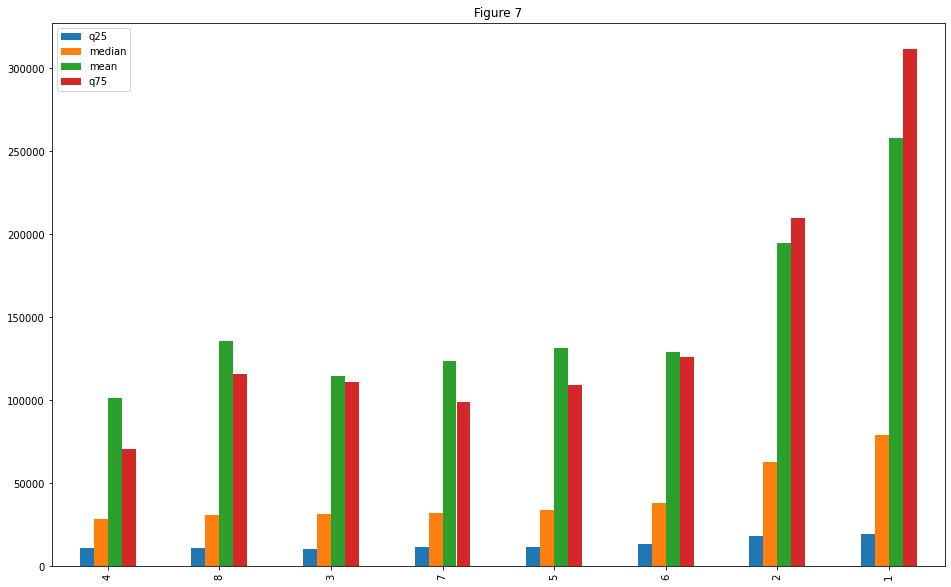

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

quest1 = pd.DataFrame()
df["russian_federal_district_cd"] = df["russian_federal_district_cd"].astype("int") # Приводим код региона к целочисленному типу
quest1.index = df["russian_federal_district_cd"].unique() # Используем коды как индекс в фрейме

quest1.insert(0, "q75", 0)       # Добавляем колонки для квантилей и среднего значения
quest1.insert(0, "mean", 0)
quest1.insert(0, "median", 0)    # Медиана является 50-ым квантилем
quest1.insert(0, "q25", 0)

districts = df.groupby("russian_federal_district_cd")["purchase_sum"]

for ind, district in districts:                     # Заполняем фрейм
    quest1["q25"][ind] = district.quantile(0.25)
    quest1["mean"][ind] = district.mean()
    quest1["median"][ind] = district.median()
    quest1["q75"][ind] = district.quantile(0.75)
    
quest1.sort_values(by="median", inplace=True)      # Сортируем по медиане
quest1.plot(kind="bar", ax=ax, title="Figure 7")

# Вопрос 2-3

<AxesSubplot:title={'center':'Figure 8'}>

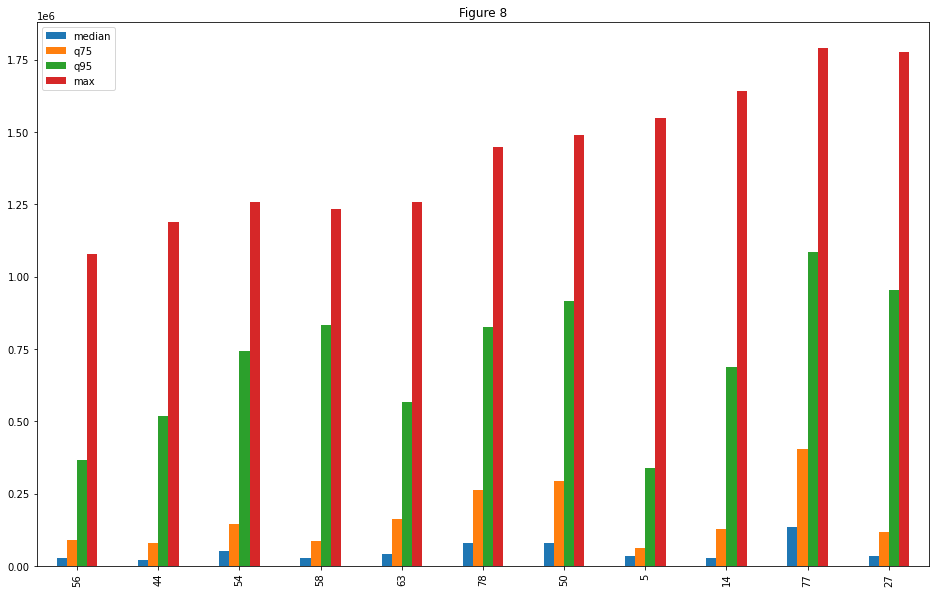

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
quest2 = pd.DataFrame()
quest2.index = df["russian_region_cd"].unique() # Приводим код региона к целочисленному типу
quest2.sort_index(inplace=True)
quest2.insert(0, "max", 0)     # Добавляем колонки для квантилей, максимального значения и медианы
quest2.insert(0, "q95", 0)      
quest2.insert(0, "q75", 0)
quest2.insert(0, "median", 0)
quest2.insert(0, "max_to_median", 0)

regions = df.groupby("russian_region_cd")["purchase_sum"]


for ind, region in regions:  # Заполняем фрейм
    region = region[region<region.quantile(0.98)] # Убираем выбросы - значения больше 98-го квантиля для каждого региона
    quest2["max"][ind] = region.max()
    quest2["q95"][ind] = region.quantile(0.95)
    quest2["median"][ind] = region.median()
    quest2["q75"][ind] = region.quantile(0.75)
    quest2["max_to_median"][ind] = region.max()-region.median() # Считаем значения разницы максимального и медианного значения
quest2.sort_values(by="max_to_median", ascending = False, inplace=True)
quest2.iloc[10::-1].plot(kind="bar", y=["median", "q75", "q95", "max"], ax=ax, title = "Figure 8")

# Вопрос 4

<AxesSubplot:>

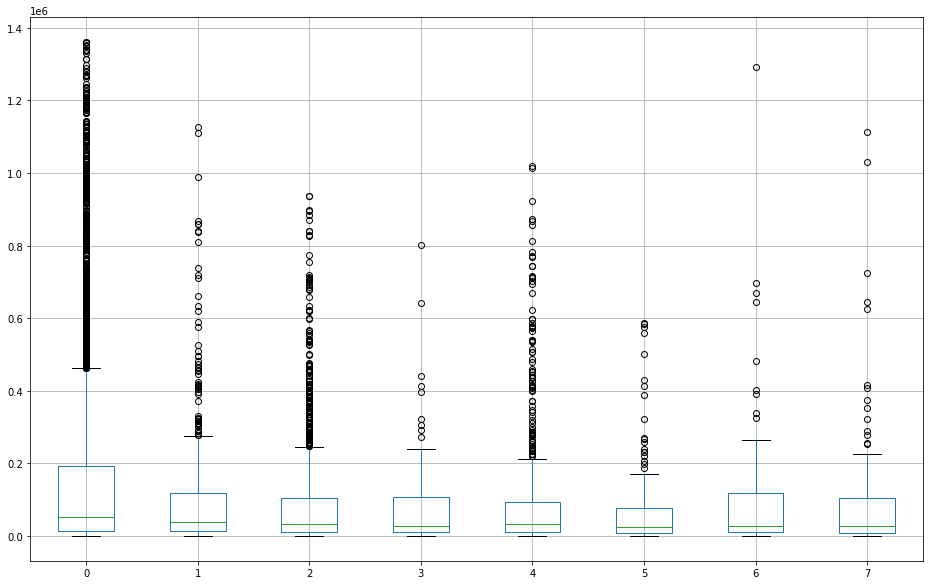

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
quest4 = pd.DataFrame()
timezones = df.groupby("timediff_to_msk_hour_cnt")["purchase_sum"]
for ind, timezone in timezones:
    if len(timezone)>66:
        timezone = timezone[timezone<timezone.quantile(0.98)]
        timezone.rename(ind, inplace=True)
        quest4 = pd.concat([quest4, timezone], axis = 1)
#         timezone.asframe().boxplot(x=ind, ax=ax)
# print(quest4)

quest4.boxplot(ax=ax)